In [6]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Brand A

# Input
heightA = ctrl.Antecedent(np.linspace(98.60, 155.00, 100), 'heightA')
weightA = ctrl.Antecedent(np.linspace(17.0 , 45.0 , 100), 'weightA')
waistA  = ctrl.Antecedent(np.linspace(45.05 , 66.00 , 100), 'waistA')

# Output 
brandA = ctrl.Consequent(np.linspace(5,14,100),'brandA')

# Memberships functions

heightA[5]   = fuzz.trimf(heightA.universe,[98.60, 111.94, 116.00])
heightA[6]   = fuzz.trimf(heightA.universe,[98.60, 118.70, 123.00])
heightA[6.5] = fuzz.trimf(heightA.universe,[98.60, 123.52, 128.00])
heightA[7]   = fuzz.trimf(heightA.universe,[98.60, 129.31, 134.00])
heightA[8]   = fuzz.trimf(heightA.universe,[98.60, 133.17, 138.00])
heightA[10]  = fuzz.trimf(heightA.universe,[98.60, 137.03, 142.00])
heightA[12]  = fuzz.trimf(heightA.universe,[98.60, 143.79, 149.00])
heightA[14]  = fuzz.trimf(heightA.universe,[98.60, 149.58, 155.00])

weightA[5]   = fuzz.trimf(weightA.universe,[17.00, 19.03, 20.00])
weightA[6]   = fuzz.trimf(weightA.universe,[17.00, 21.23, 22.00])
weightA[6.5] = fuzz.trimf(weightA.universe,[17.00, 22.20, 23.00])
weightA[7]   = fuzz.trimf(weightA.universe,[17.00, 24.13, 25.00])
weightA[8]   = fuzz.trimf(weightA.universe,[17.00, 27.02, 28.00])
weightA[10]  = fuzz.trimf(weightA.universe,[17.00, 31.85, 33.00])
weightA[12]  = fuzz.trimf(weightA.universe,[17.00, 37.64, 39.00])
weightA[14]  = fuzz.trimf(weightA.universe,[17.00, 43.43, 45.00])

waistA[5]   = fuzz.trimf(waistA.universe,[45.05, 51.15, 53.00])
waistA[6]   = fuzz.trimf(waistA.universe,[45.05, 53.08, 55.00])
waistA[6.5] = fuzz.trimf(waistA.universe,[45.05, 54.04, 56.00])
waistA[7]   = fuzz.trimf(waistA.universe,[45.05, 55.01, 57.00])
waistA[8]   = fuzz.trimf(waistA.universe,[45.05, 55.97, 58.00])
waistA[10]  = fuzz.trimf(waistA.universe,[45.05, 58.87, 61.00])
waistA[12]  = fuzz.trimf(waistA.universe,[45.05, 61.76, 64.00])
waistA[14]  = fuzz.trimf(waistA.universe,[45.05, 63.69, 66.00])

brandA['5']  = fuzz.trimf(brandA.universe,[5   , 5  , 5.5])
brandA['6']  = fuzz.trimf(brandA.universe,[5.5 , 6  , 6.5])
brandA['6X'] = fuzz.trimf(brandA.universe,[6   , 6.5, 7])
brandA['7']  = fuzz.trimf(brandA.universe,[6.5 , 7  , 7.5])
brandA['8']  = fuzz.trimf(brandA.universe,[7.5 , 8  , 8.5])
brandA['10'] = fuzz.trimf(brandA.universe,[8.5 , 10 , 11.5])
brandA['12'] = fuzz.trimf(brandA.universe,[11.5, 12 , 12.5])
brandA['14'] = fuzz.trimf(brandA.universe,[12.5, 14 , 14])



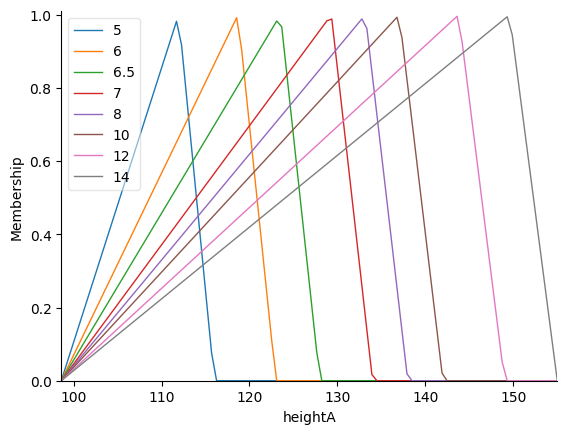

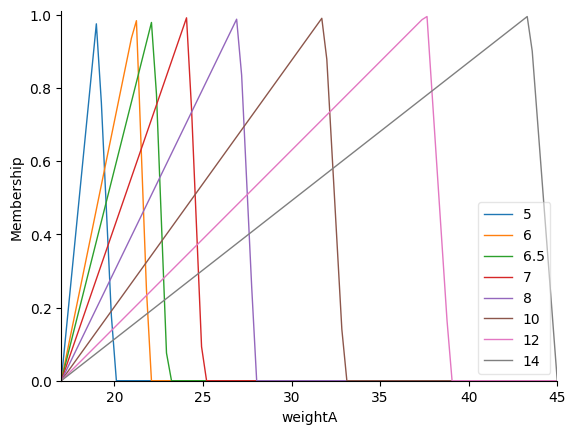

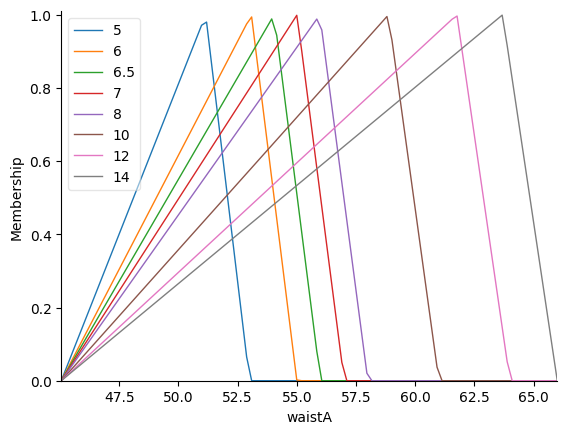

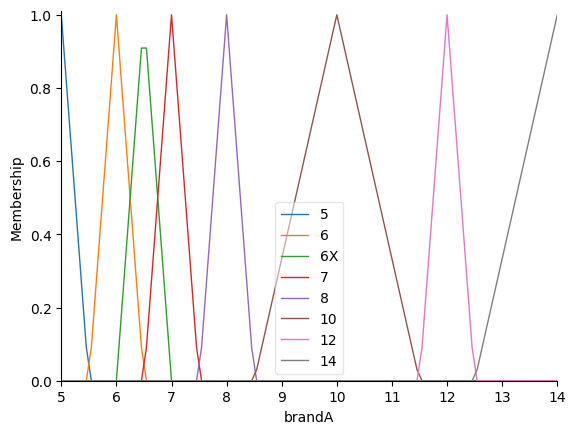

In [8]:
heightA.view()
weightA.view()
waistA.view()
brandA.view()

In [9]:
#Rules
rule = []
brandA_dict ={5: '5', 6: '6', 7: '7', 8: '8', 10: '10', 12: '12', 14: '14', 6.5: '6X' }
size = [5,6,6.5,7,8,10,12,14]

for f1 in size:
    for f2 in size:
        for f3 in size:
            c = np.max([f1,f2,f3])
            rule.append(ctrl.Rule(heightA[f1] & weightA[f2] & waistA[f3], brandA[brandA_dict[c]]))

In [10]:
#Control system
sizeA_control = ctrl.ControlSystem(rule)
sizeA_simulation = ctrl.ControlSystemSimulation(sizeA_control)

9.34283174934003


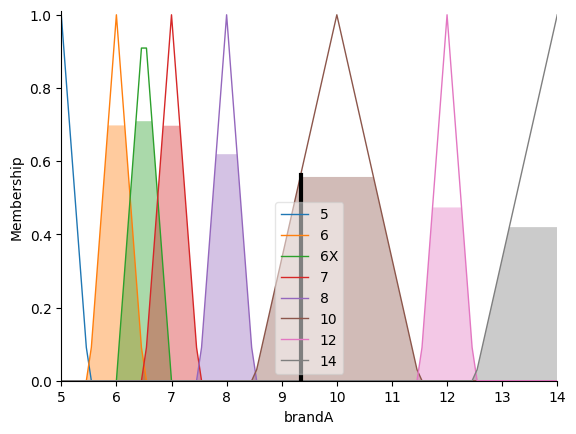

In [11]:
#Compute
sizeA_simulation.input['heightA'] = 120
sizeA_simulation.input['weightA'] = 20
sizeA_simulation.input['waistA'] = 50

sizeA_simulation.compute()
print(sizeA_simulation.output['brandA'])

#Power
brandA.view(sim = sizeA_simulation)